In [1]:
#Imports
from keras.layers import Dense, Flatten
from keras.models import Model, Sequential
from keras.applications.vgg16 import VGG16
from keras.applications.vgg16 import preprocess_input
from keras.preprocessing import image
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.layers import Dense, Conv2D,Conv3D, MaxPool2D, MaxPool3D, Flatten, BatchNormalization, Dropout
from sklearn.metrics import confusion_matrix, classification_report, multilabel_confusion_matrix
import numpy as np
import matplotlib.pyplot as plt
import splitfolders
 
from glob import glob

In [2]:
# Split folders into training, validation and test set (with splitfolders library, to be installed first)
splitfolders.ratio('C:\\Users\\admin\\SDA\\ComputerVision\\Projekt\\microsoft-catsvsdogs-dataset\\PetImages', output="output", seed=1337, ratio=(.8, 0.1,0.1))

In [3]:
# Hiperaparameters and path definitions
IMAGE_SIZE = [100, 100]

epochs = 5
batch_size = 32

path = 'C:\\Users\\admin\\SDA\\ComputerVision\\Projekt\\microsoft-catsvsdogs-dataset\\output'
train_path = 'C:\\Users\\admin\\SDA\\ComputerVision\\Projekt\\microsoft-catsvsdogs-dataset\\output\\train'
valid_path = 'C:\\Users\\admin\\SDA\\ComputerVision\\Projekt\\microsoft-catsvsdogs-dataset\\output\\val'
test_path = 'C:\\Users\\admin\\SDA\\ComputerVision\\Projekt\\microsoft-catsvsdogs-dataset\\output\\test'

image_files = glob(path + '/*/*/*.jp*g')
folders = glob(path + '/*')

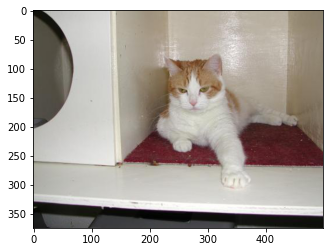

In [4]:
# Display a sample image, just for test
plt.imshow(
  image.img_to_array(
    image.load_img(
      np.random.choice(image_files)
    )
  ).astype('uint8')
)
plt.show()

In [5]:
# Generator initializaton
img_gen = ImageDataGenerator(rescale=1./255)

In [6]:
# Data generation
train_generator = img_gen.flow_from_directory(train_path, target_size=IMAGE_SIZE, class_mode='binary', shuffle=True, batch_size=batch_size) # set as training data
val_generator = img_gen.flow_from_directory(valid_path, target_size=IMAGE_SIZE, class_mode='binary', shuffle=True, batch_size=batch_size) # set as validation data
test_generator = img_gen.flow_from_directory(test_path, target_size=IMAGE_SIZE, class_mode='binary', shuffle=True, batch_size=batch_size)

Found 19998 images belonging to 2 classes.
Found 2500 images belonging to 2 classes.
Found 2502 images belonging to 2 classes.


In [7]:
print(train_generator.class_indices)
print(train_generator.labels)

{'Cat': 0, 'Dog': 1}
[0 0 0 ... 1 1 1]


In [8]:
# Preparing test images and test labels for evaluation and metrics
test_images = []
for i in range(test_generator.__len__()):
    test_images.extend(
        test_generator.__getitem__(i)[0]
        )

In [9]:
test_labels = []
for j in range(test_generator.__len__()):
    test_labels.extend(
        test_generator.__getitem__(j)[1]
        )

In [10]:
# Model
vgg = VGG16(input_shape=(100,100,3), weights='imagenet', include_top=False)
for layer in vgg.layers:
    layer.trainable = False
 

x = Flatten()(vgg.output)
prediction = Dense(1, activation='sigmoid')(x)


model = Model(inputs=vgg.input, outputs=prediction)
print(model.summary())

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 100, 100, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 100, 100, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 100, 100, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 50, 50, 64)        0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 50, 50, 128)       73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 50, 50, 128)       147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 25, 25, 128)       0     

In [11]:
model.compile(
    loss='binary_crossentropy',
    optimizer='rmsprop',
    metrics=['accuracy']
)

model.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 100, 100, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 100, 100, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 100, 100, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 50, 50, 64)        0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 50, 50, 128)       73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 50, 50, 128)       147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 25, 25, 128)       0     

In [12]:
# Skip invalid data
def my_gen(gen):
    while True:
        try:
            data, labels = next(gen)
            yield data, labels
        except PIL.UnidentifiedImageError:
            pass

In [13]:
#j.w.
train_generator = my_gen(train_generator)
val_generator = my_gen(val_generator)
test_generator = my_gen(test_generator)

In [14]:
model.fit(
          train_generator,          
          validation_data= val_generator,
          steps_per_epoch = 20000 // batch_size,
          validation_steps = 2500 // batch_size,
          verbose=1,
          epochs=3
    )

Epoch 1/3
465/625 [=====================>........] - ETA: 10:44 - loss: 0.3722 - accuracy: 0.8314

C:\Users\admin\anaconda3\lib\site-packages\PIL\TiffImagePlugin.py:763: UserWarning: Possibly corrupt EXIF data.  Expecting to read 32 bytes but only got 0. Skipping tag 270
  warnings.warn(
C:\Users\admin\anaconda3\lib\site-packages\PIL\TiffImagePlugin.py:763: UserWarning: Possibly corrupt EXIF data.  Expecting to read 5 bytes but only got 0. Skipping tag 271
  warnings.warn(
C:\Users\admin\anaconda3\lib\site-packages\PIL\TiffImagePlugin.py:763: UserWarning: Possibly corrupt EXIF data.  Expecting to read 8 bytes but only got 0. Skipping tag 272
  warnings.warn(
C:\Users\admin\anaconda3\lib\site-packages\PIL\TiffImagePlugin.py:763: UserWarning: Possibly corrupt EXIF data.  Expecting to read 8 bytes but only got 0. Skipping tag 282
  warnings.warn(
C:\Users\admin\anaconda3\lib\site-packages\PIL\TiffImagePlugin.py:763: UserWarning: Possibly corrupt EXIF data.  Expecting to read 8 bytes but only got 0. Skipping tag 283
  warnings.warn(
C:\Users\admin\anaconda3\lib\site-packages\PIL\TiffIma

625/625 [==============================] - 2830s 5s/step - loss: 0.3572 - accuracy: 0.8391 - val_loss: 0.3329 - val_accuracy: 0.8458
Epoch 2/3
625/625 [==============================] - 2821s 5s/step - loss: 0.2947 - accuracy: 0.8721 - val_loss: 0.2926 - val_accuracy: 0.8686
Epoch 3/3
625/625 [==============================] - 2829s 5s/step - loss: 0.2749 - accuracy: 0.8819 - val_loss: 0.2964 - val_accuracy: 0.8678


In [15]:
test_labels=np.asarray(test_labels)
test_images=np.asarray(test_images)

In [16]:
# Model evaluation
model.evaluate(test_images, test_labels)

79/79 [==============================] - 311s 4s/step - loss: 0.2868 - accuracy: 0.8809


[0.2867780923843384, 0.8808952569961548]

In [17]:
predictions = np.round(model.predict(test_images))
print(classification_report(test_labels, predictions))
print(confusion_matrix(test_labels, predictions))

              precision    recall  f1-score   support

         0.0       0.84      0.95      0.89      1251
         1.0       0.94      0.81      0.87      1251

    accuracy                           0.88      2502
   macro avg       0.89      0.88      0.88      2502
weighted avg       0.89      0.88      0.88      2502

[[1185   66]
 [ 232 1019]]


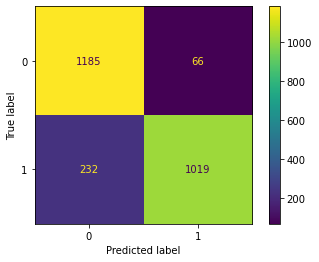

In [18]:
from sklearn.metrics import ConfusionMatrixDisplay
disp = ConfusionMatrixDisplay(confusion_matrix(test_labels, predictions))


disp.plot()
plt.show()

In [19]:
# Save model
model.save('my_model.h5_vgg')

INFO:tensorflow:Assets written to: my_model.h5_vgg\assets
